[View in Colaboratory](https://colab.research.google.com/github/RXV06021/basicPy/blob/master/try_scikit_learn.ipynb)

# Python scikit-learnの機械学習アルゴリズムチートシートを全実装・解説

http://neuro-educator.com/mlcontentstalbe/

[scikit-learnの機械学習アルゴリズムチートシート](http://scikit-learn.org/stable/tutorial/machine_learning_map/)

# 【１】SGDの実装とクラス分類

http://neuro-educator.com/mlearn1/



*   使用するアルゴリズム　　　　：SGD（stochastic gradient descent）
*   使用する機械学習ライブラリ　：scikit-learn（サイキット・ラーン）

[scikit-learnのマップ](http://scikit-learn.org/stable/tutorial/machine_learning_map/)より、
　　START→データが50以上→カテゴリーデータ→ラベルありデータ→データ数10万以上→「SGD」

**■　課題**

ワイン178本のデータを使用し、未知のワインの色とプロリン（アミノ酸の一種）の量の2変数から、その未知のワインが3つのブドウ品種のどれから作られたのかを識別する識別器を作成すること

**■　使用するデータ**

ラベル：0, 1, 2（ブドウの品種）

データ：178（ワインの数）

変数1：ワインの色

変数2：ワインに含まれるプロリンの量

## 解説０：必要なライブラリのインストール

In [2]:
! pip install mlxtend

## 解説１：ライブラリのインポート

In [0]:
#解説 1：ライブラリのインポート--------------------------------

import numpy as np                    # numpyという行列などを扱うライブラリを利用
import pandas as pd                   # pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt       # プロット用のライブラリを利用
from sklearn import linear_model, metrics, preprocessing, cross_validation   # 機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions                           # 学習結果をプロットする外部ライブラリを利用

## 解説２：Wineのデータセットの読み込み

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

からWineのデータを読み込んでいます。

そのうち、品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用します。

●[Wineデータの詳細はこちら](https://archive.ics.uci.edu/ml/datasets/Wine)

In [4]:
# 解説 2：Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# 品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']    # 列の名称を指定

pd.DataFrame(df_wine).head()                          # この行を実行するとデータの最初の5行が見れる

,class,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735


In [5]:
df_wine.describe()

,class,color,proline
count,178.000000,178.000000,178.000000
mean,1.938202,5.058090,746.893258
std,0.775035,2.318286,314.907474
min,1.000000,1.280000,278.000000
25%,1.000000,3.220000,500.500000
50%,2.000000,4.690000,673.500000
75%,3.000000,6.200000,985.000000
max,3.000000,13.000000,1680.000000


## 解説３：プロット

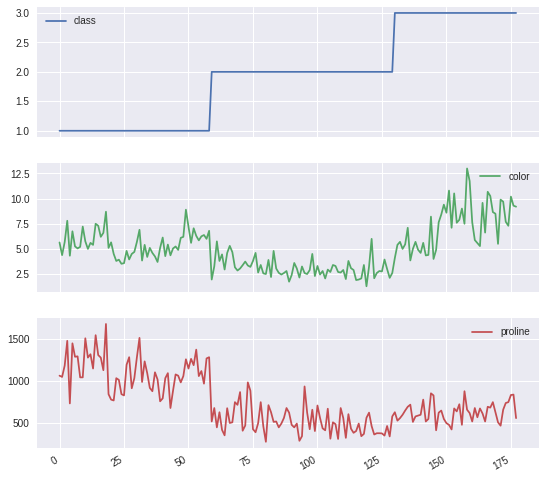

In [6]:
# 解説 3：プロットしてみる------------------------------------------------------

df_wine.plot(subplots=True, figsize=(9, 9)); plt.legend(loc='best')

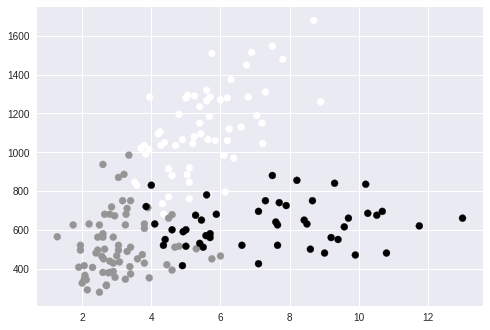

In [8]:
# 解説 3：散布図----------------------------------------------------------------

x=df_wine["color"]
y=df_wine["proline"]
z=df_wine["class"]-1

plt.scatter(x,y,c=z)
plt.show()

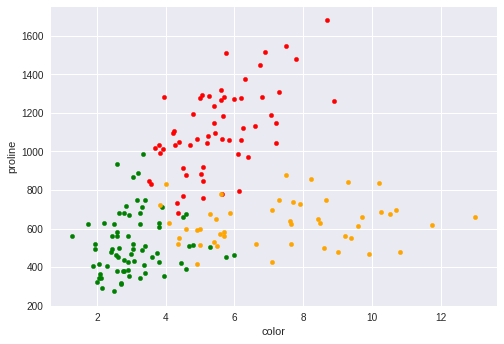

In [9]:
# 解説 3：pandas plotを使った散布図----------------------------------------------

df1 = df_wine[df_wine['class']==1]
df2 = df_wine[df_wine['class']==2]
df3 = df_wine[df_wine['class']==3]

ax1 = df1.plot(kind='scatter', x='color', y='proline', color='red' )
ax2 = df2.plot(kind='scatter', x='color', y='proline', color='green'  ,ax=ax1)
df3.plot(      kind='scatter', x='color', y='proline', color='orange' ,ax=ax2)

**※　matplotlib.pyplot.scatter の使い方**

https://pythondatascience.plavox.info/matplotlib/%E6%95%A3%E5%B8%83%E5%9B%B3

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

matplotlib.pyplot.scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None,
                          vmin=None, vmax=None, alpha=None, linewidths=None,
                          verts=None, edgecolors=None, hold=None, data=None,
                          **kwargs)

** ※　matplotlib.pyplot.scatter の主要な引数**

   x, y：グラフに出力するデータ

   s：サイズ (デフォルト値: 20)

   c：色、または、連続した色の値

   marker：マーカーの形 (デフォルト値: ‘o’= 円)

   cmap：カラーマップ。c が float 型の場合のみ利用可能です。

   norm：c を float 型の配列を指定した場合のみ有効。正規化を行う場合の Normalize インスタンスを指定。

   vmin, vmax	：正規化時の最大、最小値。 指定しない場合、データの最大・最小値となります。norm にインスタンスを指定した場合、vmin, 

vmax の指定は無視されます。

   alpha：透明度。0(透明)～1(不透明)の間の数値を指定。

   linewidths：線の太さ。

   edgecolors：線の色。

## 解説 4：データの正規化

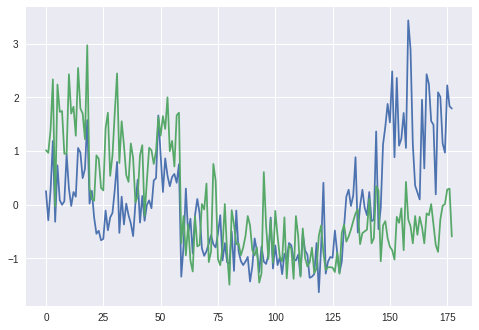

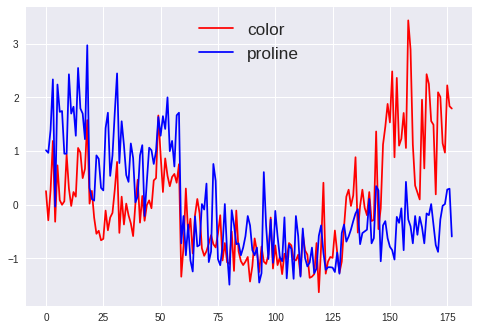

In [23]:
#解説 4：データの整形-------------------------------------------------------
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

plt.plot(X_std) 


# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(X_std[:,0], 'r' , label='color')
ax.plot(X_std[:,1], 'b' , label='proline')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()

## 解説5：機械学習で分類

今回は線形分離のSGDを用いたClassifierを作成。

In [0]:
#解説 5：機械学習で分類する---------------------------------------------------
clf_result=linear_model.SGDClassifier(loss="hinge")  #loss="hinge", loss="log"

## 解説6：実際の識別器がどの程度の性能を持つのかをK分割交差検証法で検討

これはデータをK等分して、そのうち1固まりをテストデータにし、残りのK-1個を学習データにして正答率を検討する手法。K回分の平均をとることで正答率と正答率の標準偏差を求めることが出来る。

In [34]:
#解説 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.8789129686962504
正解率の標準偏差 =  0.1054878091821119


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

正答率 =  0.9444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


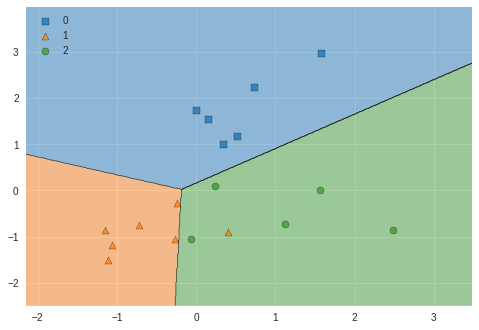

In [33]:
# 解説 7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)

# 正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

# plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)

#p lot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01)        # 学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2)  # テストデータをプロット

In [0]:
#解説 8：任意のデータに対する識別結果を見てみる------------------
#predicted_label=clf_result.predict([1,-1])
#print("このテストデータのラベル = ", predicted_label)

In [37]:
#解説 9：識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.coef_ )       # coef[0]*x + coef[1]*y + intercept = 0


[ -9.31998866 -10.91424585  -3.84711508]
[[ -9.69473758  21.8417196 ]
 [-22.46264536 -11.06530575]
 [ 15.74949076 -12.30251889]]
